In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img=cv.imread(r"C:\Users\akshi\Downloads\July_spots.jpg", cv.IMREAD_GRAYSCALE)
img_rgb=cv.imread(r"C:\Users\akshi\Downloads\July_spots.jpg", cv.IMREAD_COLOR)

# cv2 stores in BGR format and plt uses RGB
# Converting BGR color to RGB color format
#RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#cv.imshow('image',img)

#cv.waitKey(0)

In [2]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(r"C:\Users\akshi\Downloads\July_spots.jpg", cv.IMREAD_COLOR)

# Convert the image to grayscale
gray = cv2.imread(r"C:\Users\akshi\Downloads\July_spots.jpg", cv.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using Canny edge detection
edges = cv2.Canny(blurred, 120, 150)
#cv.imshow('edges',edges)
#cv.waitKey(0)

# Detect circles using Hough Circle Transform
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=100,
                           param1=50, param2=30, minRadius=150, maxRadius=1800)


circles = np.round(circles[0, :]).astype("int")
    
for (x, y, r) in circles:
    # Create a mask for the circular region
    mask = np.zeros_like(edges)
    mask=cv.circle(mask, (x, y), r-10, (255, 255, 255), thickness=-1)
  
    # Bitwise AND operation to extract the circular region
    masked_image = cv.bitwise_and(edges, edges, mask=mask)
    
    #cv.imshow('mask',masked_image)
    #cv.waitKey(0)
    # Find bounding box coordinates of the circular region
    contours, _ = cv.findContours(mask, cv2.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv.boundingRect(contours[0])



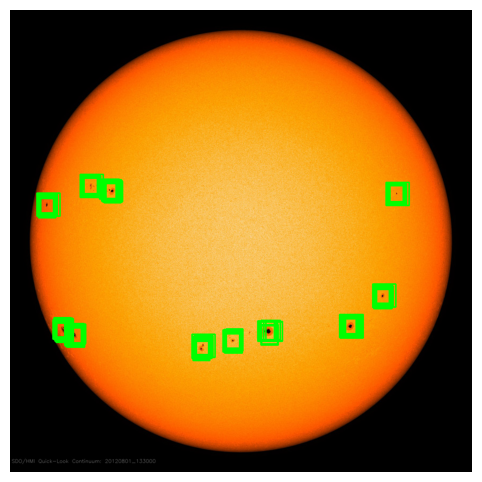

In [7]:
# Python program to illustrate 
# template matching 
import cv2 
import cv2 as cv
import numpy as np 

# Read the main image 


# Convert it to grayscale 

img_gray=cv.Canny(masked_image,125,175)
#cv.imshow('1',img_gray)
#cv.waitKey(0)
# Read the template 
template1 = cv2.imread(r"C:\Users\akshi\Downloads\temp.png", cv2.IMREAD_GRAYSCALE) 
template=cv.Canny(template1,125,175)
#cv.imshow('temp',template)
#cv.waitKey(0)

# Store width and height of template in w and h 
w, h = template.shape[::-1] 

# Perform match operations. 
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED) 

# Specify a threshold 
threshold = 0.35
detected_rectangles = []

# Store the coordinates of matched area in a numpy array 
loc = np.where(res >= threshold) 

# Draw a rectangle around the matched region. 
for pt in zip(*loc[::-1]): 
    detected_rectangles.append([pt[0], pt[1], w, h]) # Store [x, y, width, height]
    cv2.rectangle(img_rgb,pt,(pt[0]+w,pt[1]+h),(0,255,0),2) 


template1 = cv2.imread(r"C:\Users\akshi\Downloads\temp2.png", cv.IMREAD_GRAYSCALE) 
template=cv.Canny(template1,125,175)
#cv.imshow('temp',template)
#cv.waitKey(0)

# Store width and height of template in w and h 
w1, h1 = template.shape[::-1] 

# Perform match operations. 
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED) 

# Specify a threshold 
threshold = 0.155

# Store the coordinates of matched area in a numpy array 
loc = np.where(res >= threshold) 

# Draw a rectangle around the matched region. 
for pt in zip(*loc[::-1]): 
    detected_rectangles.append([pt[0], pt[1], w1, h1]) # Store [x, y, width, height]
    cv2.rectangle(img_rgb,pt,(pt[0]+w1,pt[1]+h1),(0,255,0),2) 

img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()
